# **Exploratory Data Analysis**
ส่วนนี้จะทำการ Descriptor Calculation and Exploratory Data Analysis.

---

## **Load bioactivity data**

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\MACHENIKE\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('aromatase_03_bioactivity_data_preprocessed.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24,active
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.00,active
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.70,active
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.40,active


In [4]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [5]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [10]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL341591,7100.00,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.00,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.00,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.00,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.00,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2066,CHEMBL4755831,5.24,active,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1
2067,CHEMBL4750835,104.00,active,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1
2068,CHEMBL4745681,17.70,active,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1
2069,CHEMBL4778401,60.40,active,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1


## **Calculate Lipinski descriptors**
**Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [11]:
pip install rdkit #library run Descriptors and Lipinski

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#library'
You should consider upgrading via the 'c:\Users\MACHENIKE\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## **Install conda and rdkit**

In [12]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski

### **Calculate descriptors**

In [13]:

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [14]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2066,383.451,4.53580,3.0,5.0
2067,384.439,3.93080,3.0,6.0
2068,384.439,3.93080,3.0,6.0
2069,384.435,4.65920,3.0,5.0


In [15]:
tg = input("target of interest : ")

### **Combine DataFrames**
combined 2 DataFrames.

In [16]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2066,383.451,4.53580,3.0,5.0
2067,384.439,3.93080,3.0,6.0
2068,384.439,3.93080,3.0,6.0
2069,384.435,4.65920,3.0,5.0


In [17]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24,active
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.00,active
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.70,active
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.40,active


let's combine the 2 DataFrame

In [18]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [19]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,5.24,active,383.451,4.53580,3.0,5.0
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,104.00,active,384.439,3.93080,3.0,6.0
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,17.70,active,384.439,3.93080,3.0,6.0
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,60.40,active,384.435,4.65920,3.0,5.0


### **Convert IC50 to pIC50**
เพื่อให้ข้อมูล **IC50** มีการกระจายอย่างสม่ำเสมอมากขึ้น เราจะแปลง **IC50** เป็นมาตราส่วนลอการิทึมลบ ซึ่งก็คือ **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10^-9
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [20]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [21]:
df_combined.standard_value.describe()

count      2071.000000
mean      14595.323676
std       51272.197025
min           0.000000
25%         130.000000
50%        1250.000000
75%        8850.000000
max      777000.000000
Name: standard_value, dtype: float64

In [22]:
-np.log10( (10**-9)* 100000000 )

1.0

In [23]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [25]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

ใช้ function [norm_value()] เพื่อทำให้ค่าในคอลัมน์ standard_value เป็นค่ามาตรฐาน

In [26]:
df_norm = norm_value(df_combined)
df_norm

C:\Users\MACHENIKE\AppData\Local\Temp\ipykernel_7292\3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.00
...,...,...,...,...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,383.451,4.53580,3.0,5.0,5.24
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,104.00
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,17.70
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,384.435,4.65920,3.0,5.0,60.40


In [27]:
df_norm.standard_value_norm.describe()

count      2071.000000
mean      14595.323676
std       51272.197025
min           0.000000
25%         130.000000
50%        1250.000000
75%        8850.000000
max      777000.000000
Name: standard_value_norm, dtype: float64

In [30]:
df_final = pIC50(df_norm)
df_final

C:\Users\MACHENIKE\AppData\Local\Temp\ipykernel_13328\3236955376.py:8: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
C:\Users\MACHENIKE\AppData\Local\Temp\ipykernel_13328\3236955376.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,383.451,4.53580,3.0,5.0,8.280669
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,6.982967
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,7.752027
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,384.435,4.65920,3.0,5.0,7.218963


In [31]:
df_final.pIC50.describe()

count    2071.000000
mean             inf
std              NaN
min         3.109579
25%         5.053064
50%         5.903090
75%         6.886057
max              inf
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [34]:
df_final.to_csv(tg+'_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
removing ``intermediate`` class ออกจาก data set.

In [35]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2066,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,383.451,4.53580,3.0,5.0,8.280669
2067,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,6.982967
2068,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,7.752027
2069,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,384.435,4.65920,3.0,5.0,7.218963


Write this to CSV file.

In [36]:
df_2class.to_csv(tg+'_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis Lipinski descriptors**

### **Import library**

In [39]:
pip install seaborn --upgrade

     -------------------------------------- 292.8/292.8 KB 1.6 MB/s eta 0:00:00
     --------------------------------------- 36.9/36.9 MB 13.6 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 14.4 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB 3.0 MB/s eta 0:00:00
     ------------------------------------- 930.9/930.9 KB 14.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\MACHENIKE\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [40]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

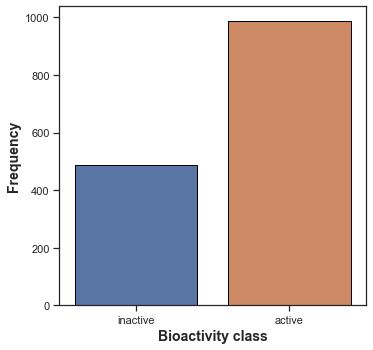

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

พล็อตการกระจายของ MW เทียบกับ LogP ดูว่าทั้ง 2 คลาสนั้นครอบคลุมพื้นที่ทางเคมีที่คล้ายคลึงกันหรือไม่

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

c:\Users\MACHENIKE\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\colors.py:1254: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
c:\Users\MACHENIKE\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\colors.py:1254: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


ValueError: Can only output finite numbers in PDF

Error in callback <function flush_figures at 0x000001AAFB45C1F0> (for post_execute):


KeyboardInterrupt: 

### **Box plots**

#### **pIC50 value**

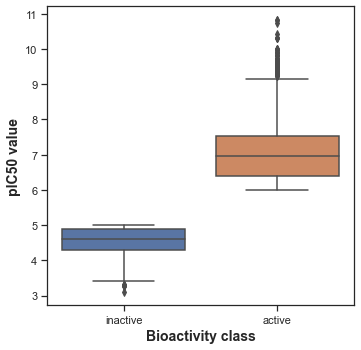

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [44]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [45]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,480654.0,1.714994e-214,0.05,Different distribution (reject H0)


#### **MW**

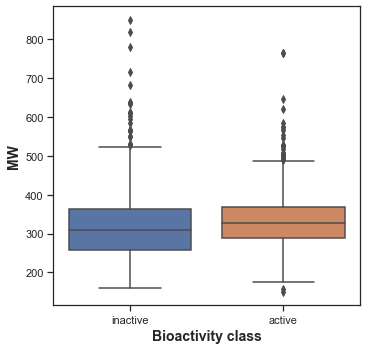

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [47]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,271787.0,0.000043,0.05,Different distribution (reject H0)


#### **LogP**

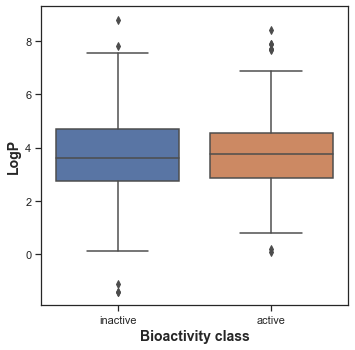

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [49]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,241130.5,0.916824,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

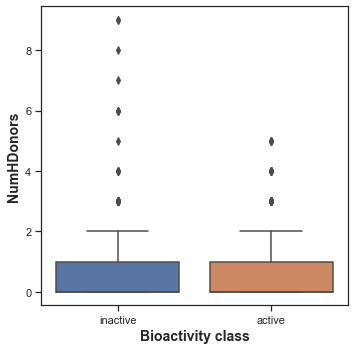

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [51]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,224786.0,0.022564,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

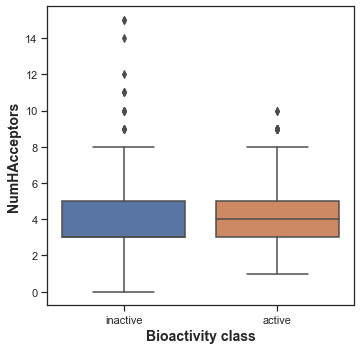

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [53]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,256962.5,0.027602,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.


## **Zip files**

In [54]:
! zip -r results.zip . -i *.csv *.pdf

  adding: aromatase_02_bioactivity_data_preprocessed.csv (172 bytes security) (deflated 80%)
  adding: aromatase_03_bioactivity_data_preprocessed.csv (172 bytes security) (deflated 81%)
  adding: aromatase_04_bioactivity_data_3class_pIC50.csv (172 bytes security) (deflated 76%)
  adding: aromatase_05_bioactivity_data_2class_pIC50.csv (172 bytes security) (deflated 76%)
  adding: aromatase_0_bioactivity_data_raw.csv (172 bytes security) (deflated 90%)
  adding: mannwhitneyu_LogP.csv (172 bytes security) (deflated 7%)
  adding: mannwhitneyu_MW.csv (172 bytes security) (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (172 bytes security) (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (172 bytes security) (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (172 bytes security) (deflated 9%)
  adding: plot_bioactivity_class.pdf (172 bytes security) (deflated 40%)
  adding: plot_ic50.pdf (172 bytes security) (deflated 37%)
  adding: plot_LogP.pdf (172 bytes security) (deflated 40%)
 